In [2]:
!pip install textblob

                                              0.0/626.3 kB ? eta -:--:--
     ------------------                     307.2/626.3 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 626.3/626.3 kB 9.9 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     -------------                            0.5/1.5 MB 10.9 MB/s eta 0:00:01
     -----------------------                  0.9/1.5 MB 11.4 MB/s eta 0:00:01
     -----------------------------            1.1/1.5 MB 8.7 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 8.7 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [19]:
!pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     -                                        10.2/300.2 kB ? eta -:--:--
     --                                    20.5/300.2 kB 217.9 kB/s eta 0:00:02
     ---                                   30.7/300.2 kB 217.9 kB/s eta 0:00:02
     -----                                 41.0/300.2 kB 217.9 kB/s eta 0:00:02
     -----                                 41.0/300.2 kB 217.9 kB/s eta 0:00:02
     -------                               61.4/300.2 kB 204.8 kB/s eta 0:00:02
     --------                              71.7/300.2 kB 206.9 kB/s eta 0:00:02
     -------------                        112.6/300.2 kB 297.7 kB/s eta 0:00:01
     -------------                        112.6/300.2 kB 297.7 kB/s eta 0:00:01
     --------------                       122.9/300.2 kB 257.2 kB/s eta 0:00:01
     --------------------                 174.1/300.2 kB 327.7 kB/s eta 0:00:01
     ------------------------             204.8/300.2

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [2]:
file_path = 'C:/Users/pktal/OneDrive/Documents/Mouthshut reviews/All reviews.csv'
df = pd.read_csv(file_path)

In [3]:
df

,user_name,user_location,review_count,review_title,review_datetime,review_views,review_content,platform
0,rajivmehta22MouthShut Verified Member,India,1 Review,ITIL 4 Foundation June 2024 batch 1,1 day ago,35 Views,ITIL 4 Foundation June 2024 batch 1Trainer nam...,Simplilearn
1,shubhaachar07MouthShut Verified Member,India,2 Reviews,Great Learning Experience!!!,4 days ago,180 Views,Simplilearn platform is very useful and helpfu...,Simplilearn
2,pujapramodaryaMouthShut Verified Member,NaN,1 Review,Excelltent,4 days ago,177 Views,Thanks Vineetyour teaching make Power BI very ...,Simplilearn
3,hembramsonali213MouthShut Verified Member,India,1 Review,Learner Friendly Content,4 days ago,178 Views,"The Simplilearn has an excellent content, the ...",Simplilearn
4,mkartikey702MouthShut Verified Member,NaN,1 Review,Power BI,4 days ago,65 Views,All the topics were relevant and were explaine...,Simplilearn
...,...,...,...,...,...,...,...,...
1960,paruchurijayanthi,India,1 Review,Best K12 Tutoring platform in India,"Mar 15, 2016 01:06 AM",24919 Views,Tried this for my son and was blown away with ...,Vedantu
1961,richaranjan23,India,1 Review,Best Place To Work,"Dec 11, 2015 11:39 AM",28849 Views,"""Your work place is second home to you"" I agre...",Vedantu
1962,soumyajain839,"Jaipur, India India",1 Review,Revolutionary Product,"Oct 13, 2015 01:31 PM",32511 Views,"Firstly, the teachers on vedantu are truly awe...",Vedantu
1963,kaulinshyam,India,1 Review,Already a part of Vedantu and I am loving it....,"Oct 13, 2015 01:24 PM",32789 Views,Currently I am working as a MAnasultanger @Roy...,Vedantu


In [4]:
# Step 1: Extract Frequent Aspects
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)  # Adjust max_features to get top N aspects
tfidf_matrix = vectorizer.fit_transform(df['review_content'])
features = vectorizer.get_feature_names_out()


In [5]:
# Step 2: Label Sentiments
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    else:
        return 'negative'

df['sentiment'] = df['review_content'].apply(get_sentiment)

In [6]:
# Step 3: Aggregate Results
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0} for aspect in features}

for _, row in df.iterrows():
    review_content = row['review_content']
    sentiment = row['sentiment']
    
    for aspect in features:
        if aspect in review_content:
            aspect_sentiments[aspect][sentiment] += 1

In [7]:
# Convert the results to a DataFrame for better visualization
aspect_sentiments_df = pd.DataFrame(aspect_sentiments).T
aspect_sentiments_df['total'] = aspect_sentiments_df['positive'] + aspect_sentiments_df['negative']

print(aspect_sentiments_df)

                          positive  negative  total
appreciate                    1751       197   1948
course                         897        44    941
courses                        338         6    344
effort                        1752       197   1949
flag                             0         0      0
good                           615        16    631
learning                       495        18    513
reviewirrelevantfakejunk         0         0      0
simplilearn                    148         4    152
thank                          118         2    120


In [8]:
# Remove irrelevant aspects with zero total occurrences
cleaned_aspect_sentiments_df = aspect_sentiments_df[aspect_sentiments_df['total'] > 0]

print(cleaned_aspect_sentiments_df)

             positive  negative  total
appreciate       1751       197   1948
course            897        44    941
courses           338         6    344
effort           1752       197   1949
good              615        16    631
learning          495        18    513
simplilearn       148         4    152
thank             118         2    120


In [9]:
# Convert counts to percentages
cleaned_aspect_sentiments_df['positive_percentage'] = (cleaned_aspect_sentiments_df['positive'] / cleaned_aspect_sentiments_df['total']) * 100
cleaned_aspect_sentiments_df['negative_percentage'] = (cleaned_aspect_sentiments_df['negative'] / cleaned_aspect_sentiments_df['total']) * 100

print(cleaned_aspect_sentiments_df)

             positive  negative  total  positive_percentage  \
appreciate       1751       197   1948            89.887064   
course            897        44    941            95.324123   
courses           338         6    344            98.255814   
effort           1752       197   1949            89.892252   
good              615        16    631            97.464342   
learning          495        18    513            96.491228   
simplilearn       148         4    152            97.368421   
thank             118         2    120            98.333333   

             negative_percentage  
appreciate             10.112936  
course                  4.675877  
courses                 1.744186  
effort                 10.107748  
good                    2.535658  
learning                3.508772  
simplilearn             2.631579  
thank                   1.666667  


C:\Users\pktal\AppData\Local\Temp\ipykernel_9372\2641870993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_aspect_sentiments_df['positive_percentage'] = (cleaned_aspect_sentiments_df['positive'] / cleaned_aspect_sentiments_df['total']) * 100
C:\Users\pktal\AppData\Local\Temp\ipykernel_9372\2641870993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_aspect_sentiments_df['negative_percentage'] = (cleaned_aspect_sentiments_df['negative'] / cleaned_aspect_sentiments_df['total']) * 100


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from textblob import TextBlob

In [11]:
# Preprocess to get sentiments
def get_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0 else 0

df['sentiment'] = df['review_content'].apply(get_sentiment)

In [12]:
# Extract aspects based on repetition
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)  # Adjust max_features as needed
tfidf_matrix = vectorizer.fit_transform(df['review_content'])
aspects = vectorizer.get_feature_names_out()

In [13]:
# Generate aspect sentiment labels
def generate_aspect_labels(row, aspects):
    labels = {aspect: row['sentiment'] for aspect in aspects if aspect in row['review_content']}
    return labels

df['aspect_labels'] = df.apply(lambda row: generate_aspect_labels(row, aspects), axis=1)

In [14]:
# Prepare data for each aspect
aspect_data = {aspect: [] for aspect in aspects}
aspect_labels = {aspect: [] for aspect in aspects}

for _, row in df.iterrows():
    for aspect in aspects:
        if aspect in row['review_content']:
            aspect_data[aspect].append(row['review_content'])
            aspect_labels[aspect].append(row['sentiment'])

In [15]:
# Train models for each aspect
models = {}
vectorizers = {}

for aspect in aspects:
    X = aspect_data[aspect]
    y = aspect_labels[aspect]
    
    if len(X) > 0:  # Ensure there is data to train on
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        vectorizer = TfidfVectorizer(stop_words='english')
        X_train_vectorized = vectorizer.fit_transform(X_train)
        X_test_vectorized = vectorizer.transform(X_test)
        
        model = LogisticRegression()
        model.fit(X_train_vectorized, y_train)
        
        y_pred = model.predict(X_test_vectorized)
        print(f"Training model for aspect: {aspect}")
        print(classification_report(y_test, y_pred))
        
        models[aspect] = model
        vectorizers[aspect] = vectorizer

Training model for aspect: appreciate
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        40
           1       0.91      1.00      0.95       350

    accuracy                           0.91       390
   macro avg       0.95      0.56      0.59       390
weighted avg       0.92      0.91      0.88       390

Training model for aspect: course
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.94      1.00      0.97       178

    accuracy                           0.94       189
   macro avg       0.47      0.50      0.49       189
weighted avg       0.89      0.94      0.91       189

Training model for aspect: courses
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        68

    accuracy                           0.99        69
   macro avg       0.

C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metr

Training model for aspect: effort
              precision    recall  f1-score   support

           0       1.00      0.10      0.19        39
           1       0.91      1.00      0.95       351

    accuracy                           0.91       390
   macro avg       0.95      0.55      0.57       390
weighted avg       0.92      0.91      0.88       390

Training model for aspect: good
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       126

    accuracy                           0.99       127
   macro avg       0.50      0.50      0.50       127
weighted avg       0.98      0.99      0.99       127

Training model for aspect: learning
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       103

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00   

C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metr

In [16]:
def classify_review(review, models, vectorizers, aspects):
    results = {}
    for aspect in aspects:
        if aspect in review:
            review_vectorized = vectorizers[aspect].transform([review])
            sentiment = models[aspect].predict(review_vectorized)
            results[aspect] = 'positive' if sentiment == 1 else 'negative'
    return results

# Test the function with a new review
new_review = "The price of this product is good but the quality is poor."
aspect_sentiments = classify_review(new_review, models, vectorizers, aspects)
print(aspect_sentiments)

{'good': 'positive'}


In [17]:
df

,user_name,user_location,review_count,review_title,review_datetime,review_views,review_content,platform,sentiment,aspect_labels
0,rajivmehta22MouthShut Verified Member,India,1 Review,ITIL 4 Foundation June 2024 batch 1,1 day ago,35 Views,ITIL 4 Foundation June 2024 batch 1Trainer nam...,Simplilearn,1,"{'appreciate': 1, 'effort': 1}"
1,shubhaachar07MouthShut Verified Member,India,2 Reviews,Great Learning Experience!!!,4 days ago,180 Views,Simplilearn platform is very useful and helpfu...,Simplilearn,1,"{'appreciate': 1, 'course': 1, 'effort': 1, 'g..."
2,pujapramodaryaMouthShut Verified Member,NaN,1 Review,Excelltent,4 days ago,177 Views,Thanks Vineetyour teaching make Power BI very ...,Simplilearn,1,"{'appreciate': 1, 'effort': 1}"
3,hembramsonali213MouthShut Verified Member,India,1 Review,Learner Friendly Content,4 days ago,178 Views,"The Simplilearn has an excellent content, the ...",Simplilearn,1,"{'appreciate': 1, 'effort': 1}"
4,mkartikey702MouthShut Verified Member,NaN,1 Review,Power BI,4 days ago,65 Views,All the topics were relevant and were explaine...,Simplilearn,1,"{'appreciate': 1, 'effort': 1}"
...,...,...,...,...,...,...,...,...,...,...
1960,paruchurijayanthi,India,1 Review,Best K12 Tutoring platform in India,"Mar 15, 2016 01:06 AM",24919 Views,Tried this for my son and was blown away with ...,Vedantu,1,{'good': 1}
1961,richaranjan23,India,1 Review,Best Place To Work,"Dec 11, 2015 11:39 AM",28849 Views,"""Your work place is second home to you"" I agre...",Vedantu,1,{'effort': 1}
1962,soumyajain839,"Jaipur, India India",1 Review,Revolutionary Product,"Oct 13, 2015 01:31 PM",32511 Views,"Firstly, the teachers on vedantu are truly awe...",Vedantu,1,{'good': 1}
1963,kaulinshyam,India,1 Review,Already a part of Vedantu and I am loving it....,"Oct 13, 2015 01:24 PM",32789 Views,Currently I am working as a MAnasultanger @Roy...,Vedantu,1,{}


In [18]:
df['sentiment'].value_counts()

1    1767
0     198
Name: sentiment, dtype: int64

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

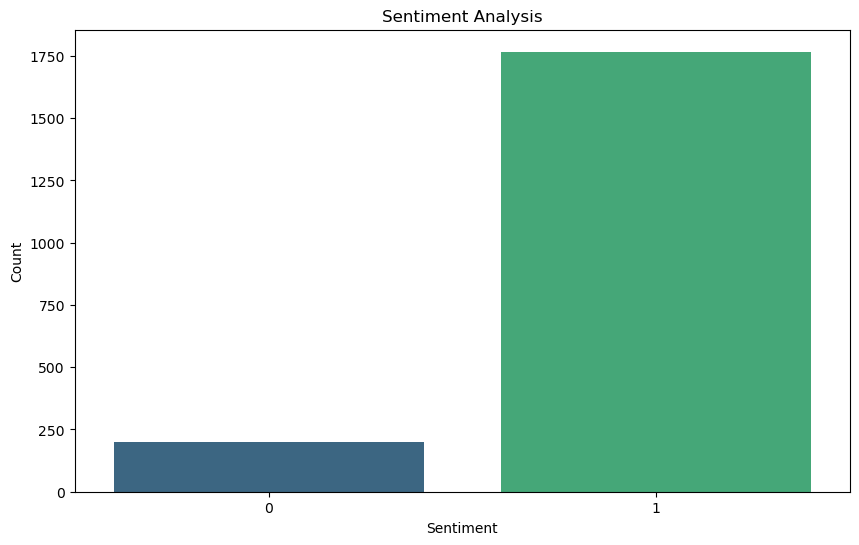

In [178]:

# Bar Chart
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

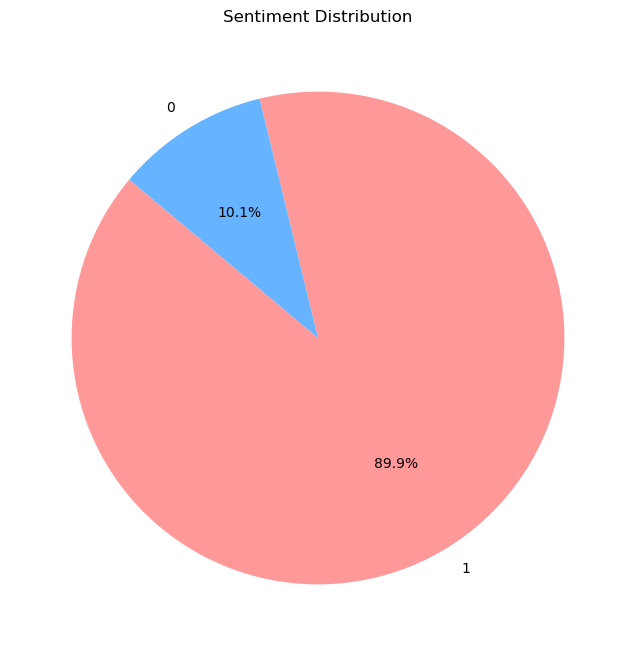

In [179]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.show()

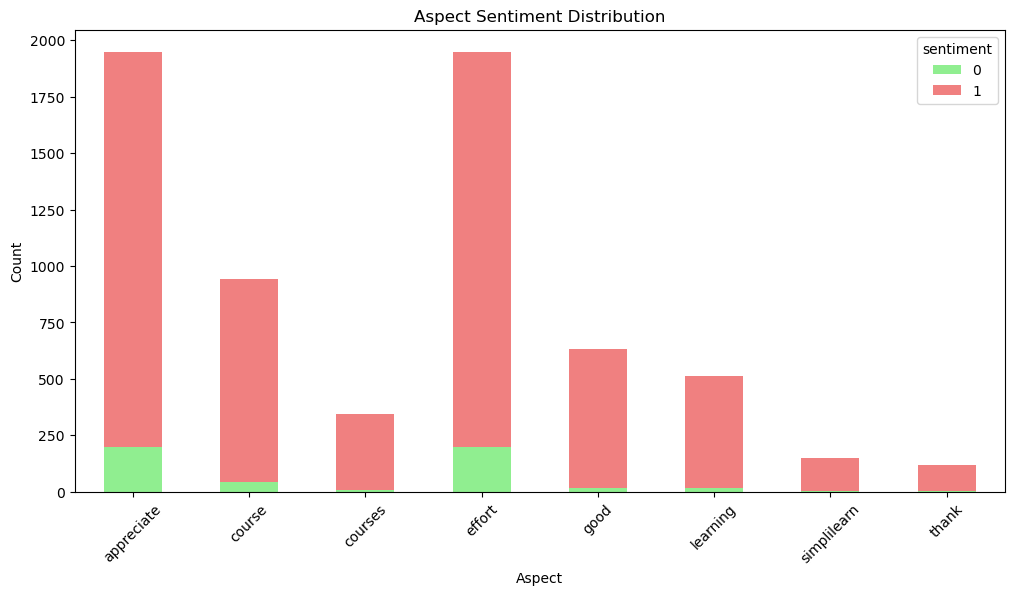

In [181]:
from collections import Counter

aspect_sentiments = []

for index, row in df.iterrows():
    for aspect, sentiment in row['aspect_labels'].items():
        aspect_sentiments.append((aspect, row['sentiment']))

aspect_sentiment_df = pd.DataFrame(aspect_sentiments, columns=['aspect', 'sentiment'])
aspect_sentiment_counts = aspect_sentiment_df.groupby(['aspect', 'sentiment']).size().unstack(fill_value=0)

# Plotting
aspect_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightgreen', 'lightcoral'])
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.title('Aspect Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

In [182]:
from dateutil import parser
from datetime import datetime, timedelta

In [141]:
# Sample function to convert relative date strings
def convert_relative_date(relative_date_str):
    if pd.isna(relative_date_str):  # Check if it's NaT
        return pd.NaT  # Return NaT if it's NaT
    if 'day' in relative_date_str:
        days_ago = int(relative_date_str.split()[0])
        return datetime.now() - timedelta(days=days_ago)
    else:
        # Handle other cases as needed
        return pd.NaT


In [ ]:
# Assign sentiment scores
df['sentiment_score'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Group by date and calculate mean sentiment score
sentiment_over_time = df.groupby(df['review_datetime'].dt.date)['sentiment_score'].mean()

# Plotting
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Over Time')
plt.grid(True)
plt.show()

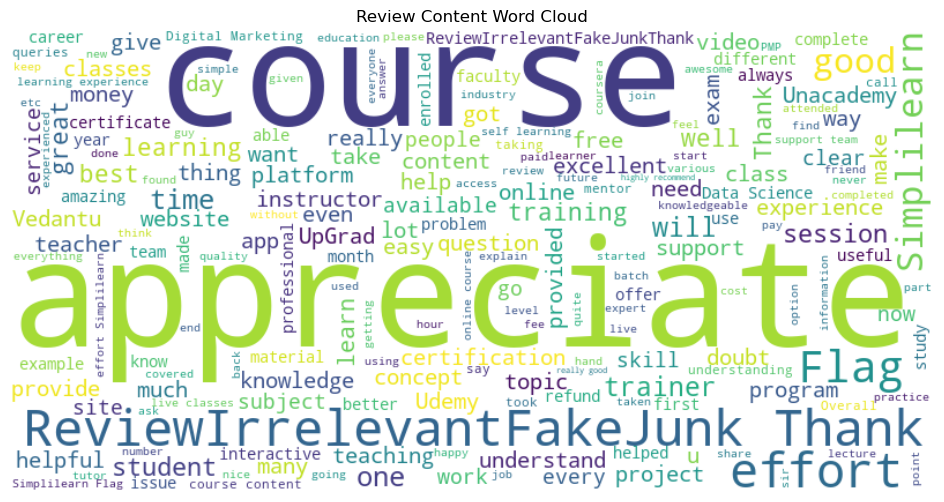

In [183]:
from wordcloud import WordCloud

# Combine all review content into a single string
review_text = ' '.join(df['review_content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Review Content Word Cloud')
plt.show()

In [184]:
from collections import defaultdict

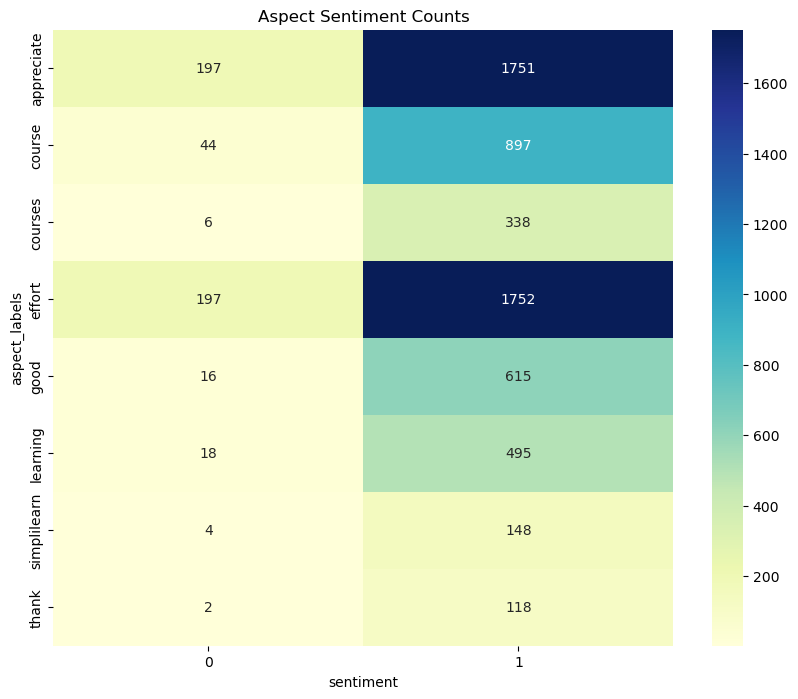

In [185]:
# Step 1: Flatten aspect_labels into separate rows
aspect_sentiment = defaultdict(list)
for idx, row in df.iterrows():
    for aspect, count in row['aspect_labels'].items():
        aspect_sentiment['aspect_labels'].append(aspect)
        aspect_sentiment['sentiment'].append(row['sentiment'])

# Convert to DataFrame
df_aspect_sentiment = pd.DataFrame(aspect_sentiment)

# Step 2: Group by aspect_labels and sentiment, and count occurrences
aspect_sentiment_counts = df_aspect_sentiment.groupby(['aspect_labels', 'sentiment']).size().unstack(fill_value=0)

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(aspect_sentiment_counts, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Aspect Sentiment Counts')
plt.show()

<Figure size 1200x800 with 0 Axes>

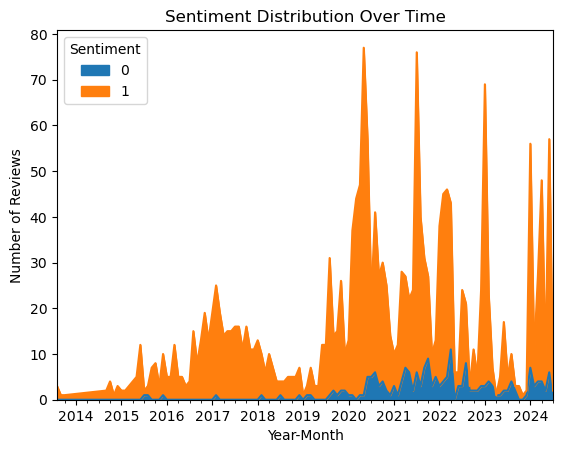

In [189]:
# Function to convert relative datetime strings to datetime objects
def convert_relative_datetime(dt_str):
    try:
        if isinstance(dt_str, str) and 'day' in dt_str:
            days_ago = int(dt_str.split()[0])
            return datetime.now() - timedelta(days=days_ago)
        else:
            # Handle other formats or unexpected types
            return pd.to_datetime(dt_str)
    except Exception as e:
        print(f"Error converting {dt_str}: {e}")
        return pd.NaT  # Return NaT (Not a Time) for invalid entries

# Apply the function to the review_datetime column
df['review_datetime'] = df['review_datetime'].apply(convert_relative_datetime)

# Optionally, extract year and month for grouping
df['year_month'] = df['review_datetime'].dt.to_period('M')

# Group by year_month and sentiment, and count occurrences
sentiment_over_time = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sentiment_over_time.plot(kind='area', stacked=True)
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution Over Time')
plt.legend(title='Sentiment')
plt.show()

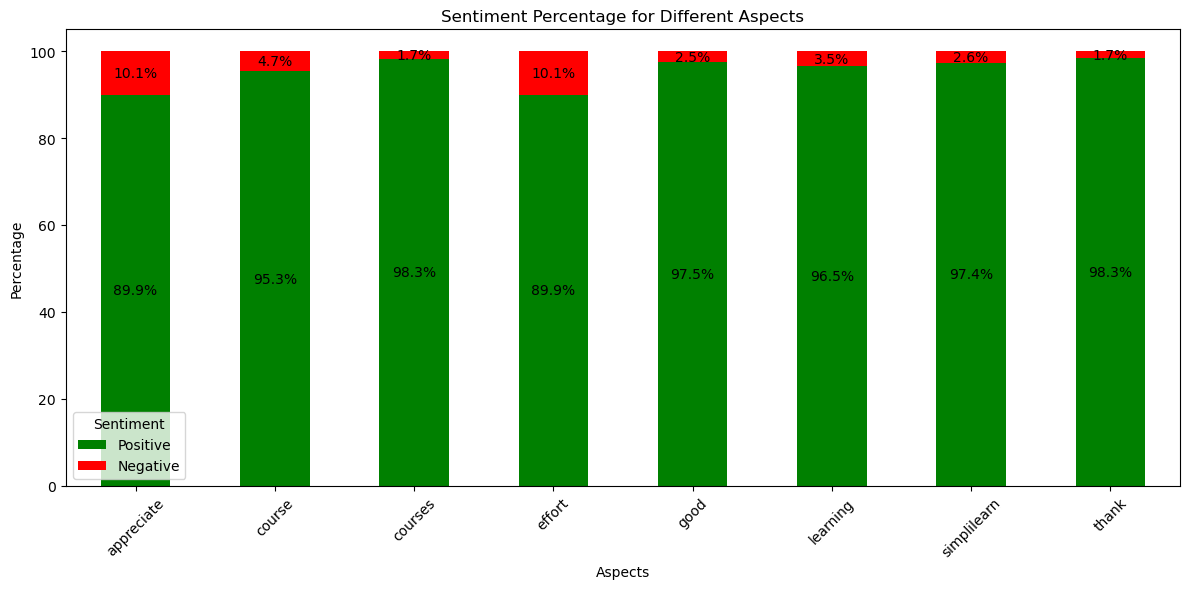

In [22]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Create the stacked bar plot
cleaned_aspect_sentiments_df[['positive_percentage', 'negative_percentage']].plot(
    kind='bar', stacked=True, color=['green', 'red'], ax=ax)

# Add titles and labels
ax.set_title('Sentiment Percentage for Different Aspects')
ax.set_xlabel('Aspects')
ax.set_ylabel('Percentage')
ax.legend(['Positive', 'Negative'], title='Sentiment')

# Add percentages on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment Counts:
 sentiment     0     1
platform             
Coursera      2    84
Simplilearn  47  1143
Udemy        11    69
Unacademy    39   125
Upgrad        8   217
Vedantu      91   129

Sentiment Percentages:
 sentiment     0     1  total  positive_percentage  negative_percentage
platform                                                              
Coursera      2    84     86            97.674419             2.325581
Simplilearn  47  1143   1190            96.050420             3.949580
Udemy        11    69     80            86.250000            13.750000
Unacademy    39   125    164            76.219512            23.780488
Upgrad        8   217    225            96.444444             3.555556
Vedantu      91   129    220            58.636364            41.363636


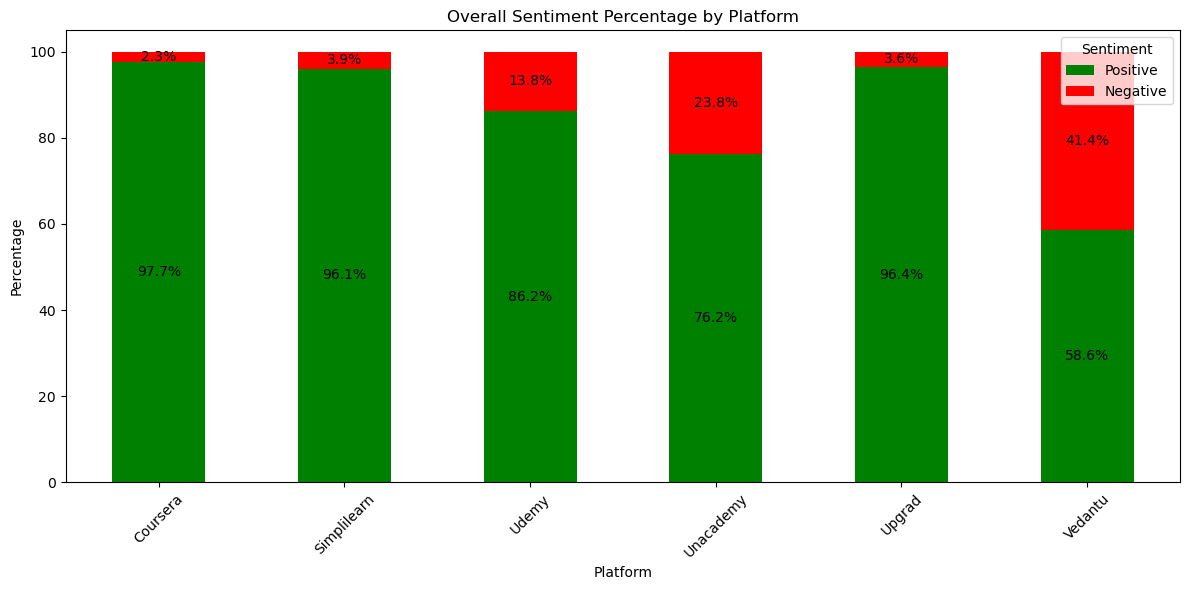

In [28]:
# Calculate the sentiment counts for each platform
sentiment_counts = df.groupby(['platform', 'sentiment']).size().unstack(fill_value=0)
print("\nSentiment Counts:\n", sentiment_counts)

# Calculate the total counts and percentages
sentiment_counts['total'] = sentiment_counts.sum(axis=1)
sentiment_counts['positive_percentage'] = (sentiment_counts.get(1, 0) / sentiment_counts['total']) * 100
sentiment_counts['negative_percentage'] = (sentiment_counts.get(0, 0) / sentiment_counts['total']) * 100

print("\nSentiment Percentages:\n", sentiment_counts)

# Ensure there are entries to plot
if not sentiment_counts.empty:
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the stacked bar plot
    sentiment_counts[['positive_percentage', 'negative_percentage']].plot(
        kind='bar', stacked=True, color=['green', 'red'], ax=ax)

    # Add titles and labels
    ax.set_title('Overall Sentiment Percentage by Platform')
    ax.set_xlabel('Platform')
    ax.set_ylabel('Percentage')
    ax.legend(['Positive', 'Negative'], title='Sentiment')

    # Add percentages on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available.")


Sentiment Counts:
 sentiment     0     1
platform             
Coursera      2    84
Simplilearn  47  1143
Udemy        11    69
Unacademy    39   125
Upgrad        8   217
Vedantu      91   129


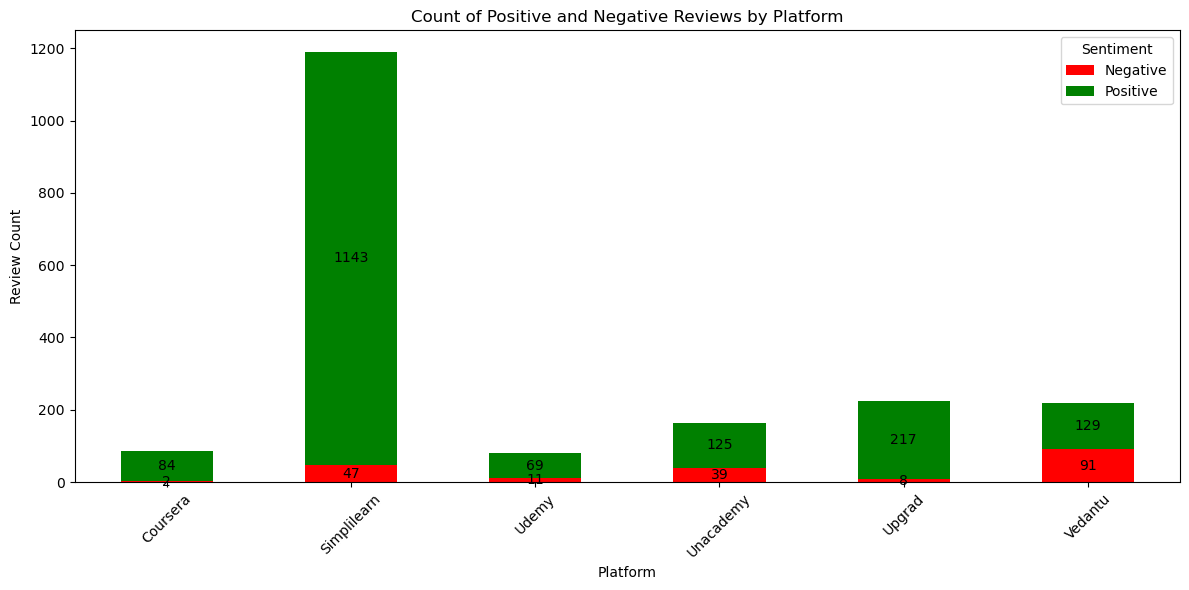

In [29]:
# Calculate the sentiment counts for each platform
sentiment_counts = df.groupby(['platform', 'sentiment']).size().unstack(fill_value=0)
print("\nSentiment Counts:\n", sentiment_counts)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Create the stacked bar plot
sentiment_counts.plot(
    kind='bar', stacked=True, color=['red', 'green'], ax=ax)

# Add titles and labels
ax.set_title('Count of Positive and Negative Reviews by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Review Count')
ax.legend(['Negative', 'Positive'], title='Sentiment')

# Add counts on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Logistic regression
# Step 1: Data Preparation
X = df['review_content']  # Text data
y = df['sentiment']  # Sentiment labels

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 6: Predictions and Analysis
# Example prediction on new data
new_reviews = ["This course was amazing!", "The instructor was bad at teaching."]
X_new = vectorizer.transform(new_reviews)
predictions = model.predict(X_new)
print("Predictions:", predictions)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        42
           1       0.91      1.00      0.95       351

    accuracy                           0.91       393
   macro avg       0.95      0.58      0.62       393
weighted avg       0.92      0.91      0.88       393

Predictions: [1 1]


In [33]:
# Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Step 1: Data Preparation
X = df['review_content']  # Text data
y = df['sentiment']  # Sentiment labels

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 4: Model Training (Using Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 6: Predictions and Analysis
# Example prediction on new data
new_reviews = ["This course was amazing!", "I didn't like the instructor."]
X_new = vectorizer.transform(new_reviews)
predictions = model.predict(X_new)
print("Predictions:", predictions)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.89      1.00      0.94       351

    accuracy                           0.89       393
   macro avg       0.45      0.50      0.47       393
weighted avg       0.80      0.89      0.84       393

Predictions: [1 1]


C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pktal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Data Preparation
X = df['review_content']  # Text data
y = df['sentiment']  # Sentiment labels

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 4: Model Training (Using SVM)
model = SVC(kernel='linear', random_state=42)  # Linear kernel for SVM
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 6: Predictions and Analysis
# Example prediction on new data
new_reviews = ["This course was amazing!", "I didn't like the instructor."]
X_new = vectorizer.transform(new_reviews)
predictions = model.predict(X_new)
print("Predictions:", predictions)

              precision    recall  f1-score   support

           0       0.87      0.48      0.62        42
           1       0.94      0.99      0.97       351

    accuracy                           0.94       393
   macro avg       0.91      0.73      0.79       393
weighted avg       0.93      0.94      0.93       393

Predictions: [1 1]


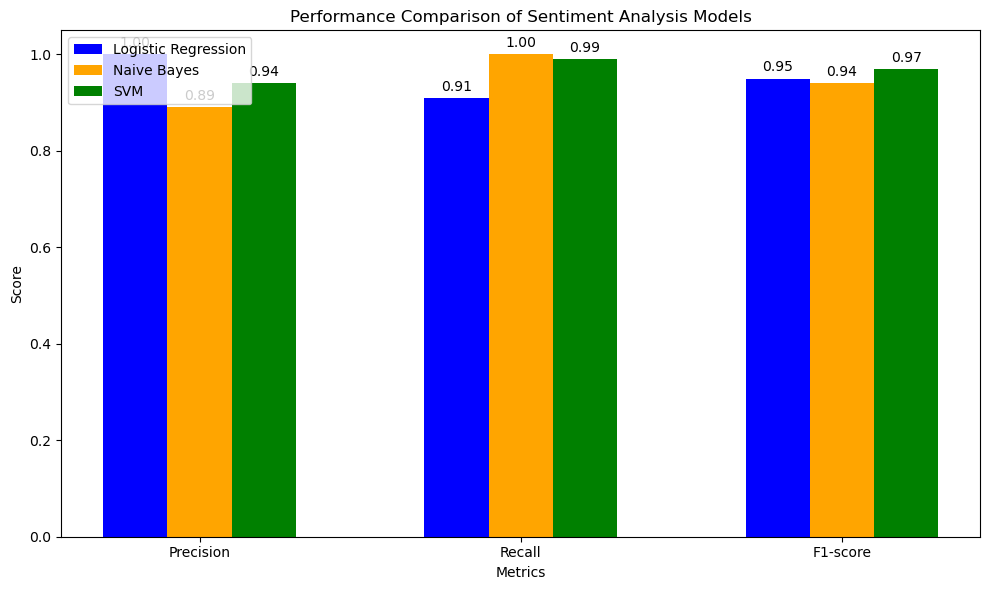

In [37]:
import numpy as np

# Data for comparison (precision, recall, f1-score for all models)
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
metrics = ['Precision', 'Recall', 'F1-score']

# Data for Logistic Regression
lr_metrics = np.array([1.00, 0.91, 0.95])  # Precision, Recall, F1-score

# Data for Naive Bayes
nb_metrics = np.array([0.89, 1.00, 0.94])  # Precision, Recall, F1-score

# Data for SVM
svm_metrics = np.array([0.94, 0.99, 0.97])  # Precision, Recall, F1-score

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(metrics))

# Plotting bars for each model
bar1 = ax.bar(index - bar_width, lr_metrics, bar_width, label='Logistic Regression', color='blue')
bar2 = ax.bar(index, nb_metrics, bar_width, label='Naive Bayes', color='orange')
bar3 = ax.bar(index + bar_width, svm_metrics, bar_width, label='SVM', color='green')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison of Sentiment Analysis Models')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Adding text annotations for each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()
